## Optimizer

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from module import Module
from enums import GradientDescentMode
from linear import Linear
from activation import TanH, Sigmoid, ReLU
from sequential import Sequential
from loss import MSELoss
from optimizers import Optim, SGD
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-whitegrid')

In [4]:
def LTLS(input, hidden, output):
    return Sequential(
        Linear(input, hidden),
        TanH(),
        Linear(hidden, output),
        Sigmoid()
    )

In [5]:
def evaluate_fn(net, X_test, y_test):
    yhat = net(X_test)
    acc = ((yhat >= 0.5).astype(int) == y_test).mean()
    return acc

In [6]:
def generate_data_ltls(input, hidden, output, n_samples=1_000):
    np.random.seed(42)
    X = np.random.randn(n_samples, input)
    W1 = np.random.random((input, hidden))
    W2 = np.random.random((hidden, output))
    y = Sigmoid() ((TanH() ((X @ W1+ np.random.random()))) @ W2 + np.random.random()).reshape(-1)
    y = np.where(y >= .5, 1, 0)
    return X, y

In [7]:
input = 2
hidden = 10
output = 1
X, y = generate_data_ltls(input, hidden, output, n_samples=5_000)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [8]:
net = LTLS(2, 10, 1)
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    1e-3,
    X_train,
    y_train,
    2_000,
    GradientDescentMode.BATCH,
    -1,
    evaluate_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 200: train loss: 0.23089937550861195 val loss: 0.23187365121985842 val eval_fn: 0.56811875
Epoch 400: train loss: 0.2163879915106422 val loss: 0.21769439474273505 val eval_fn: 0.66759375
Epoch 600: train loss: 0.20311803173837148 val loss: 0.20472878589682494 val eval_fn: 0.772475
Epoch 800: train loss: 0.19100223230236962 val loss: 0.19289161320128428 val eval_fn: 0.90655
Epoch 1000: train loss: 0.17995186257320853 val loss: 0.18209629087561413 val eval_fn: 0.9303375
Epoch 1200: train loss: 0.1698794935961725 val loss: 0.17225751530127784 val eval_fn: 0.9325
Epoch 1400: train loss: 0.1607009010227317 val loss: 0.1632930945282963 val eval_fn: 0.9325
Epoch 1600: train loss: 0.1523362940930992 val loss: 0.15512513360168978 val eval_fn: 0.9325
Epoch 1800: train loss: 0.1447110360030261 val loss: 0.14768073301820958 val eval_fn: 0.9325
Epoch 2000: train loss: 0.13775599108946385 val loss: 0.14089232906188273 val eval_fn: 0.9325
------------

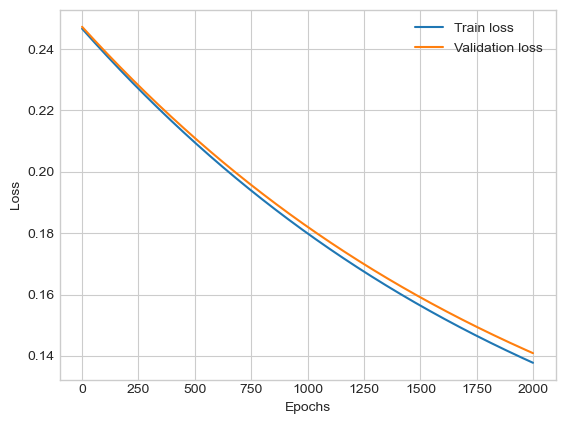

In [9]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

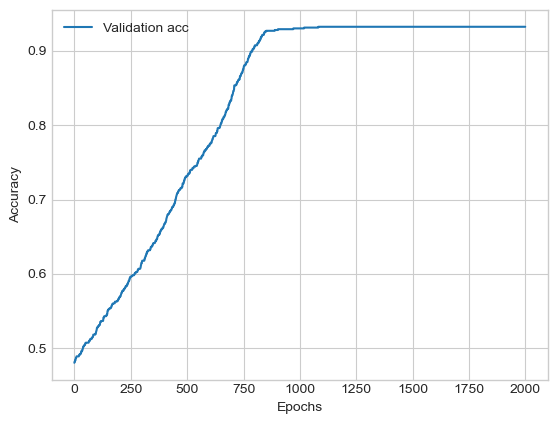

In [10]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
best_parameters

[{'W': array([[-1.20429506, -0.05925782,  0.57883569,  0.66983304,  0.35353034,
          -0.38504595, -1.39596138, -0.34856914, -0.21608046, -0.22606711],
         [ 0.44003439,  1.40422689,  0.07362583, -0.14750636, -0.19069784,
           0.07514741, -0.58693615,  0.08994879,  0.31666123,  0.12635097]]),
  'b': array([ 0.01586931,  0.0169082 , -0.09544082,  0.03173871, -0.03954706,
         -0.06494413, -0.03824991,  0.0260414 , -0.01241867, -0.10548006])},
 None,
 {'W': array([[ 0.14684694],
         [ 0.16014695],
         [-0.56124499],
         [ 0.20525523],
         [-0.21873668],
         [-0.35372875],
         [-0.36135101],
         [ 0.13894132],
         [-0.06227692],
         [-0.53951768]]),
  'b': array([0.21138797])},
 None]

In [12]:
net.set_parameters(best_parameters)
print('Test acc :', evaluate_fn(net, X_test, y_test))

Test acc : 0.948


In [13]:
net = LTLS(2, 10, 1)
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    1e-3,
    X_train,
    y_train,
    1_000,
    GradientDescentMode.MINI_BATCH,
    320,
    evaluate_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 100: 
Batch 320: train loss: 0.19355295818659793 val loss: 0.19064893330865418 val eval_fn: 0.61353125
Batch 640: train loss: 0.18399856980809579 val loss: 0.19059641872457614 val eval_fn: 0.61353125
Batch 960: train loss: 0.19488250544832347 val loss: 0.19054057793598897 val eval_fn: 0.61353125
Batch 1280: train loss: 0.17972201934378287 val loss: 0.1904911015785938 val eval_fn: 0.61353125
Batch 1600: train loss: 0.20238412991402283 val loss: 0.19043612366415316 val eval_fn: 0.61353125
Batch 1920: train loss: 0.1865161495501655 val loss: 0.1903834757761853 val eval_fn: 0.61353125
Batch 2240: train loss: 0.17055309271476196 val loss: 0.19033462450336752 val eval_fn: 0.61353125
Batch 2560: train loss: 0.17920252971168166 val loss: 0.19028502608977454 val eval_fn: 0.6146125
Batch 2880: train loss: 0.1838382827555712 val loss: 0.19023436477380848 val eval_fn: 0.61569375
Batch 3200: train loss: 0.1919581005098074 val loss: 0.190179928515410

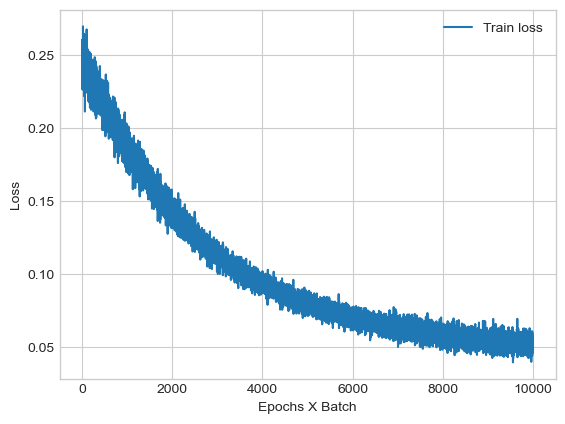

In [14]:
plt.plot(all_loss, label='Train loss')
plt.xlabel('Epochs X Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()

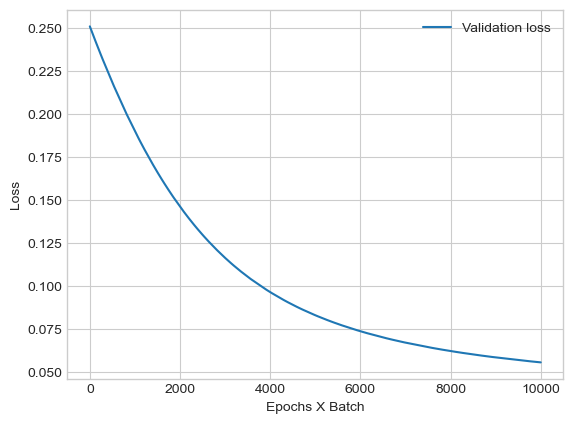

In [15]:
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs X Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()

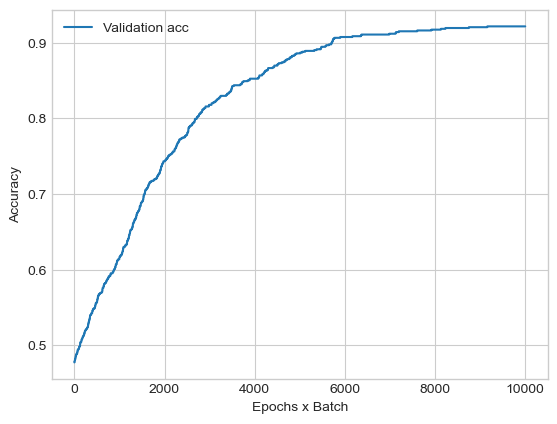

In [16]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs x Batch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
net.set_parameters(best_parameters)
print('Test acc :', evaluate_fn(net, X_test, y_test))

Test acc : 0.938144
